In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/Users/sid/virtual_envs/jupyter-numpy/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
%cat train.csv | wc -l
%cat test.csv | wc -l

In [5]:
data = np.loadtxt('train.csv', delimiter=',', skiprows=1, dtype=np.int)
hei = wid =  int((data.shape[1] - 1) ** 0.5)
print data.shape
print hei, wid

(42000, 785)
28 28


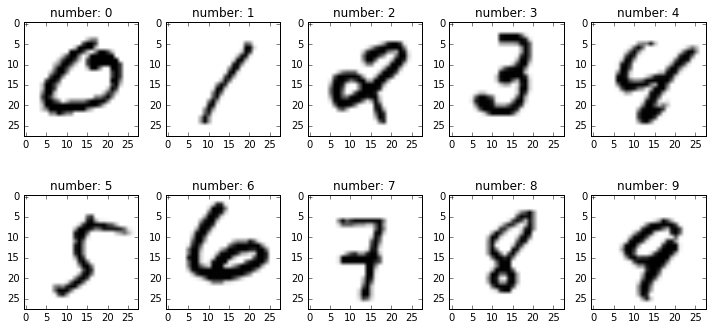

In [6]:
# 1.(b) display handwrite numbers 0-9
def show(data):
    plt.figure(figsize=(10, 5))
    for y in range(10):
        x = data[data[:,0] == y, :][np.random.randint(50),1:].reshape((hei, wid))
        ax = plt.subplot(2, 5, y+1)
        ax.set_title("number: %d" % y)
        ax.imshow(x, cmap=cm.binary)
    plt.tight_layout()
        
show(data)

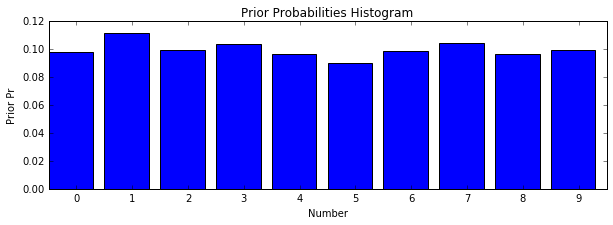

In [7]:
# 1.(c) prior probabilities

def prior_pr(data, num):
    return np.count_nonzero(data[:, 0] == num) / float(data.shape[0])

prior_pr_list = [prior_pr(data, num) for num in range(10)]

# fig = plt.figure(figsize=(10, 3))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# ax.bar([i - 0.5 for i in range(10)], prior_pr_list)
# #plt.title("Prior Pr")
# ax.set_title("Prior Probabilities Histogram")
# ax.set_xlabel("Number")
# ax.set_ylabel("Prior Pr")
# ax.set_xticks(range(10))

plt.figure(figsize=(10, 3))
plt.bar([i - 0.5 for i in range(10)], prior_pr_list)
plt.xticks(np.arange(10))
plt.xlim(-0.5, 9.5)
plt.title("Prior Probabilities Histogram")
plt.xlabel("Number")
plt.ylabel("Prior Pr")





In [11]:
class MyClassifier(object):
    def train(self, yX):
        pass
    def predict(self, x):
        pass
    

class NearestNeighbr(MyClassifier):
    def __init__(self, k=1):
        self.k = k
    
    def train(self, yX, norm='l2'):
        '''
        stick to MNIST's format: N * (1 + p)
        '''
        self.data = yX # lazy train
        self.norm = norm
    
    def _get_nn(self, x, k=None):
        if k is None:
            k = self.k
            
        if self.norm is 'l2':
            penalty_list = np.sqrt(np.sum((self.data[:, 1:] - x) ** 2, axis=1))
        elif self.norm is 'l1':
            penalty_list = np.sum(np.abs(self.data[:, 1:] - x), axis=1)
            
        if k > 1:
            idx = np.argsort(penalty_list, axis=0)[:k]
        else:
            idx = np.array([np.argmin(penalty_list)]) # number --> [number]

        return self.data[idx, :], penalty_list[idx]
        
    def predict(self, x):
        neighbors, _ = self._get_nn(x)
        if self.k == 1:
            return neighbors[0,0]
        else:
            Y = neighbors[:, 0]
            _ = {}
            for y in list(Y):
                _[y] = _.get(y, 0) + 1
            ret = sorted(_.iteritems(), key=lambda kv: kv[1], reverse=True)
            return ret[0][0]

In [12]:
from sklearn import cross_validation

yX_train, yX_test = cross_validation.train_test_split(data)

print yX_train.shape
print yX_test.shape

(31500, 785)
(10500, 785)


In [13]:
cls = NearestNeighbor(k=5)
cls.train(yX_train)

minor = yX_test[:1000]
accuracy = np.apply_along_axis(lambda r: cls.predict(r[1:]), 1, minor) == minor[:, 0]
print 1 - len(accuracy.nonzero()) / float(len(accuracy))

0.999


In [ ]:
# 1.(e)



In [ ]:
# Learn Numpy play ground....
a = (data[:, 1:] - data[2, 1:]) ** 2
print data[:, 1:].shape
print data[0, 1:].shape
print a.shape
l2 = np.sum(a, axis=1)
print l2.shape
print l2[:10]
idx = np.argmin(l2)
print idx


In [21]:
t1 = np.array([[1, 2], [3, 12], [15, 10]])
t2 = np.array([1, 3])

# print type(t1 - t2)
# print np.sqrt(np.sum((t1 - t2)**2, axis=1))

# ii = (t1[:, 0] == 1).nonzero()[0][0]
# i = np.ones(t1.shape[0], dtype=bool)
# i[ii] = 0
# print t1[i, :]

print t1
print "\n"
print np.argsort(t1, axis=0)[:, 1]



[[ 1  2]
 [ 3 12]
 [15 10]]


[0 2 1]


In [35]:
cross_validation.train_test_split(range(10))

[[0, 8, 9, 7, 4, 5, 3], [2, 6, 1]]

In [3]:
import numpy as np
a = np.array([[1, 2, 3, 4]])
a.reshape(2, 2)

array([[1, 2],
       [3, 4]])